Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [3]:
%matplotlib inline
np.random.seed(42)
plt.rcParams['figure.figsize'] = 6, 6

Printing first 10 rows

In [4]:
df=pd.read_csv('/content/travel insurance.csv.zip')
columns_df = list(df.columns)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


Data pre-processing/cleaning

Renaming columns

In [5]:
df.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Dist_Channel', 'Product Name':'Prod_Name',
                   'Net Sales':'Net_Sales', 'Commision (in value)':'Commission'},inplace=True)

In [6]:
df.shape

(63326, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        63326 non-null  object 
 1   Agency_Type   63326 non-null  object 
 2   Dist_Channel  63326 non-null  object 
 3   Prod_Name     63326 non-null  object 
 4   Claim         63326 non-null  object 
 5   Duration      63326 non-null  int64  
 6   Destination   63326 non-null  object 
 7   Net_Sales     63326 non-null  float64
 8   Commission    63326 non-null  float64
 9   Gender        18219 non-null  object 
 10  Age           63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [143]:
df.describe()

,Agency,Agency_Type,Dist_Channel,Prod_Name,Claim,Duration,Destination,Net_Sales,Commission,Age
count,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000
mean,6.654913,0.724331,0.982519,9.292029,0.014639,28.435650,5.706708,30.832164,9.809992,36.832960
std,2.371884,0.446854,0.131056,6.642143,0.120102,25.801246,2.738925,20.175065,19.804388,6.286455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,6.000000,0.000000,1.000000,1.000000,0.000000,9.000000,4.000000,18.500000,0.000000,35.000000
50%,7.000000,1.000000,1.000000,10.000000,0.000000,22.000000,6.000000,27.000000,0.000000,36.000000
75%,7.000000,1.000000,1.000000,14.000000,0.000000,38.000000,8.000000,39.000000,11.550000,36.000000
max,15.000000,1.000000,1.000000,25.000000,1.000000,119.000000,10.000000,96.000000,283.500000,55.000000


Handling Missing Values

In [8]:
df.isnull().sum()

Agency              0
Agency_Type         0
Dist_Channel        0
Prod_Name           0
Claim               0
Duration            0
Destination         0
Net_Sales           0
Commission          0
Gender          45107
Age                 0
dtype: int64

Removing Missing values

In [9]:
df.drop(columns=['Gender'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        63326 non-null  object 
 1   Agency_Type   63326 non-null  object 
 2   Dist_Channel  63326 non-null  object 
 3   Prod_Name     63326 non-null  object 
 4   Claim         63326 non-null  object 
 5   Duration      63326 non-null  int64  
 6   Destination   63326 non-null  object 
 7   Net_Sales     63326 non-null  float64
 8   Commission    63326 non-null  float64
 9   Age           63326 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


Filling the missing values

In [12]:
df.isnull().Duration

0        False
1        False
2        False
3        False
4        False
         ...  
63321    False
63322    False
63323    False
63324    False
63325    False
Name: Duration, Length: 63326, dtype: bool

In [13]:
df['Duration'] = df['Duration'].fillna(df['Duration'].mean())

In [18]:
df.isnull().Net_Sales

0        False
1        False
2        False
3        False
4        False
         ...  
63321    False
63322    False
63323    False
63324    False
63325    False
Name: Net_Sales, Length: 63326, dtype: bool

In [19]:
df['Net_Sales'] = df['Net_Sales'].fillna(df['Net_Sales'].median())

In [20]:
df.isnull().Age

0        False
1        False
2        False
3        False
4        False
         ...  
63321    False
63322    False
63323    False
63324    False
63325    False
Name: Age, Length: 63326, dtype: bool

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].mode())

In [22]:
df.describe()

,Duration,Net_Sales,Commission,Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317263,42.007265,9.809992,39.969981
std,101.791474,47.727754,19.804388,14.017010
min,0.000000,0.000000,0.000000,0.000000
25%,9.000000,18.500000,0.000000,35.000000
50%,22.000000,27.000000,0.000000,36.000000
75%,53.000000,49.500000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Handling negative values

In [11]:
df[['Duration','Net_Sales', 'Commission', 'Age']] = abs(df[['Duration','Net_Sales', 'Commission', 'Age']])

In [23]:
pip install datasist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 7.6 MB/s 
     |████████████████████████████████| 1.6 MB 29.0 MB/s 
     |████████████████████████████████| 82 kB 693 kB/s 


Detecting Outliers

In [24]:
from datasist.structdata import detect_outliers
index = detect_outliers(df,0,['Duration','Net_Sales', 'Age'])
ouliers_percentage = len(index)/len(df)*50
ouliers_percentage



11.467643621893062

In [25]:
for col in df[['Duration','Net_Sales', 'Age']]:
    index = detect_outliers(df, 0, [col])
    col_median = df[col].median()
    df[col].iloc[index] = col_median

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

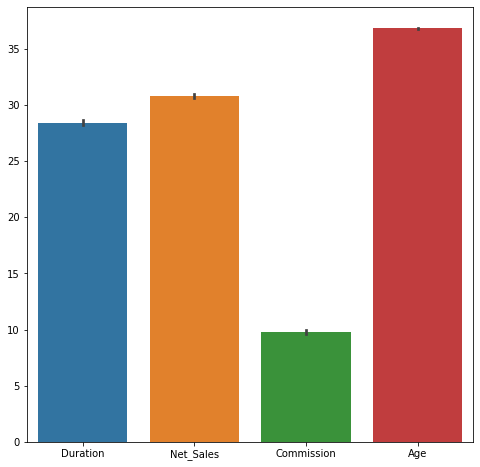

In [26]:
plt.figure(figsize=[8,8])
sns.barplot(data=df)

Handling Categorical data 

In [105]:
a = df.drop(columns='Claim')
b = df['Claim']

In [106]:
a = pd.get_dummies(a,drop_first = True)
a

,Agency,Agency_Type,Dist_Channel,Prod_Name,Duration,Destination,Net_Sales,Commission,Age
0,3,1,0,12,22,5,29.0,9.57,36
1,3,1,0,12,22,5,29.0,9.57,36
2,6,1,1,16,65,0,49.5,29.70,32
3,6,1,1,16,60,0,39.6,23.76,32
4,6,1,1,16,79,6,19.8,11.88,41
...,...,...,...,...,...,...,...,...,...
63321,9,0,1,8,111,6,35.0,12.25,31
63322,9,0,1,8,58,1,40.0,14.00,40
63323,9,0,1,8,2,5,18.0,6.30,36
63324,9,0,1,8,3,6,18.0,6.30,36


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        63326 non-null  object 
 1   Agency_Type   63326 non-null  object 
 2   Dist_Channel  63326 non-null  object 
 3   Prod_Name     63326 non-null  object 
 4   Claim         63326 non-null  object 
 5   Duration      63326 non-null  int64  
 6   Destination   63326 non-null  object 
 7   Net_Sales     63326 non-null  float64
 8   Commission    63326 non-null  float64
 9   Age           63326 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


Splitting data into train dataset and test dataset

In [33]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size= 0.3, random_state= 28, stratify= b)

In [34]:
b_train.value_counts()

No     43679
Yes      649
Name: Claim, dtype: int64

In [35]:
b_test.value_counts()

No     18720
Yes      278
Name: Claim, dtype: int64

In [36]:
a_train.duplicated().sum()

7882

Feature scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a_train_scaled = scaler.fit_transform(a_train)
a_test_scaled = scaler.transform(a_test)

In [38]:
a_train_scaled = pd.DataFrame(a_train_scaled,columns = scaler.get_feature_names_out())
a_train_scaled

,Duration,Net_Sales,Commission,Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,2.647086,-1.034947,-0.496408,-0.134280,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
1,-0.636062,-0.441555,-0.106172,-0.134280,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
2,-0.288435,1.437517,0.263793,1.931189,-0.073004,2.597748,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
3,-0.829189,0.943024,-0.496408,-0.134280,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
4,-0.945064,-0.293208,0.327143,-1.723103,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44323,-0.790563,-0.787700,-0.192328,0.660131,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
44324,1.758705,-0.095411,-0.011400,2.725601,-0.073004,-0.384949,-0.040614,18.438672,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
44325,-0.674688,-0.540454,-0.496408,-0.134280,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
44326,-0.172559,-0.441555,-0.106172,-0.134280,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227


In [39]:
a_test_scaled = pd.DataFrame(a_test_scaled,columns = scaler.get_feature_names_out())
a_test_scaled

,Duration,Net_Sales,Commission,Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,-0.867814,1.177908,0.197402,1.295660,-0.073004,2.597748,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
1,-0.906439,1.041923,-0.496408,-0.134280,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
2,0.484071,-0.060796,0.406711,0.342367,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,2.517028,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
3,3.110589,2.386943,1.911908,-0.134280,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,2.517028,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
4,-0.558812,-0.639352,-0.496408,-0.134280,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18993,2.144957,-0.985497,-0.496408,-0.769809,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
18994,0.677197,-0.095411,-0.496408,-0.134280,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
18995,-0.945064,2.426502,-0.496408,-0.134280,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,-0.397294,...,-0.143468,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227
18996,1.063450,-0.550344,0.105671,2.725601,-0.073004,-0.384949,-0.040614,-0.054234,-0.034599,2.517028,...,6.970215,-0.202854,-0.00475,-0.012567,-0.0095,-0.008227,-0.164216,-0.00475,-0.008227,-0.008227


In [40]:
df['Destination'].unique()

array(['MALAYSIA', 'AUSTRALIA', 'ITALY', 'UNITED STATES', 'THAILAND',
       "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF", 'NORWAY', 'VIET NAM',
       'DENMARK', 'SINGAPORE', 'JAPAN', 'UNITED KINGDOM', 'INDONESIA',
       'INDIA', 'CHINA', 'FRANCE', 'TAIWAN, PROVINCE OF CHINA',
       'PHILIPPINES', 'MYANMAR', 'HONG KONG', 'KOREA, REPUBLIC OF',
       'UNITED ARAB EMIRATES', 'NAMIBIA', 'NEW ZEALAND', 'COSTA RICA',
       'BRUNEI DARUSSALAM', 'POLAND', 'SPAIN', 'CZECH REPUBLIC',
       'GERMANY', 'SRI LANKA', 'CAMBODIA', 'AUSTRIA', 'SOUTH AFRICA',
       'TANZANIA, UNITED REPUBLIC OF', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'NEPAL', 'NETHERLANDS', 'MACAO', 'CROATIA', 'FINLAND', 'CANADA',
       'TUNISIA', 'RUSSIAN FEDERATION', 'GREECE', 'BELGIUM', 'IRELAND',
       'SWITZERLAND', 'CHILE', 'ISRAEL', 'BANGLADESH', 'ICELAND',
       'PORTUGAL', 'ROMANIA', 'KENYA', 'GEORGIA', 'TURKEY', 'SWEDEN',
       'MALDIVES', 'ESTONIA', 'SAUDI ARABIA', 'PAKISTAN', 'QATAR', 'PERU',
       'LUXEMBOURG',

Cleaning destination

In [41]:
df1=df.groupby(by=["Destination"]).size().reset_index(name="counts")
df1=df1.nlargest(10,['counts'])
dest_top = list(df1['Destination'])
df['Destination'] = df['Destination'].apply(lambda x: "OTHERS" if x not in dest_top else x)

In [42]:
df['Destination'].unique()

array(['MALAYSIA', 'AUSTRALIA', 'OTHERS', 'UNITED STATES', 'THAILAND',
       'SINGAPORE', 'INDONESIA', 'INDIA', 'CHINA', 'PHILIPPINES',
       'HONG KONG'], dtype=object)

In [43]:
df.columns

Index(['Agency', 'Agency_Type', 'Dist_Channel', 'Prod_Name', 'Claim',
       'Duration', 'Destination', 'Net_Sales', 'Commission', 'Age'],
      dtype='object')

Exploratory data analysis

Univariate Analysis

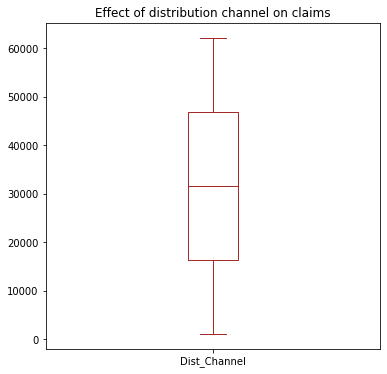

In [108]:
df['Dist_Channel'].value_counts().plot(kind='box',color='brown')
plt.title("Effect of distribution channel on claims")
plt.show()

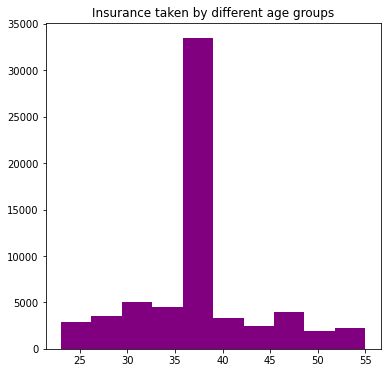

In [46]:
plt.hist(df['Age'],bins=10,color='purple')
plt.title("Insurance taken by different age groups")
plt.show()

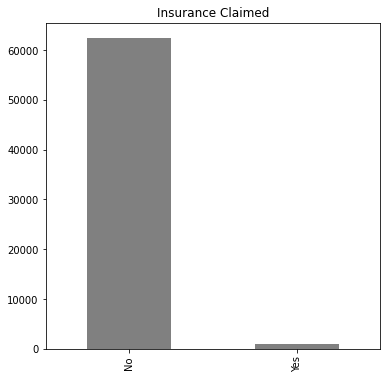

In [64]:
df['Claim'].value_counts()[:].plot(kind='bar',color='grey')
plt.title('Insurance Claimed')
plt.show()

Bi-variate analysis

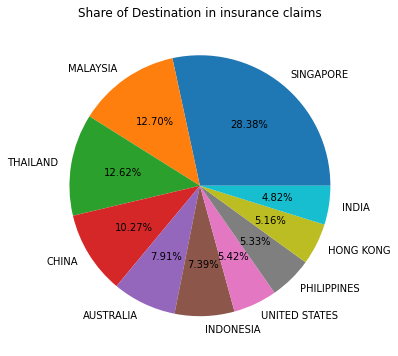

In [70]:
plt.pie(x=df1['counts'],labels=df1['Destination'],autopct='%2.2f%%')
plt.title('Share of Destination in insurance claims')
plt.show()

In [72]:
df['Claim'].value_counts()

No     62399
Yes      927
Name: Claim, dtype: int64

In [73]:
df['Agency_Type'].unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [74]:
df['Dist_Channel'].unique()

array(['Offline', 'Online'], dtype=object)

In [75]:
df['Destination'].value_counts()

OTHERS           16623
SINGAPORE        13255
MALAYSIA          5930
THAILAND          5894
CHINA             4796
AUSTRALIA         3694
INDONESIA         3452
UNITED STATES     2530
PHILIPPINES       2490
HONG KONG         2411
INDIA             2251
Name: Destination, dtype: int64

Agency type with highest number of claims

In [76]:
def claim(x):
    if x == "Yes":
        return 1
    else:
        return 0
df['Claim'] = df['Claim'].apply(claim)

In [77]:
highest_Agency_Type = df.groupby('Agency_Type')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(10)
highest_Agency_Type

,Claim
Agency_Type,
Airlines,591
Travel Agency,336


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of claims depending on the agency type')

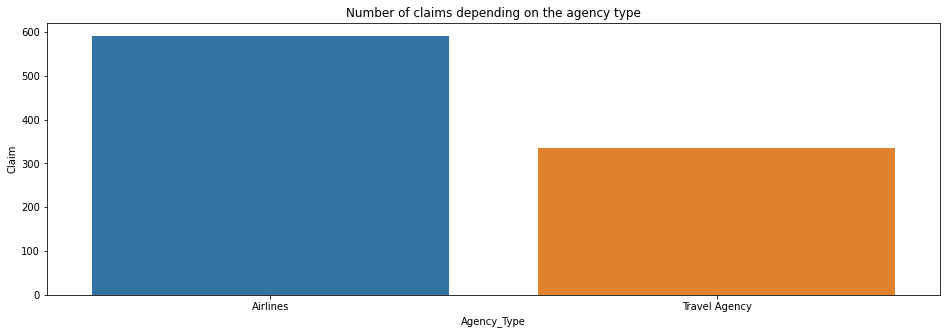

In [78]:
plt.figure(figsize=[16,5])
sns.barplot(highest_Agency_Type.index,highest_Agency_Type['Claim'])
plt.title('Number of claims depending on the agency type')

Effect of destination on claims

In [79]:
highest_Destination = df.groupby('Destination')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(10)
highest_Destination

,Claim
Destination,
SINGAPORE,562
OTHERS,141
CHINA,46
AUSTRALIA,38
UNITED STATES,37
THAILAND,34
MALAYSIA,23
HONG KONG,15
INDONESIA,15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of claims per destinantion')

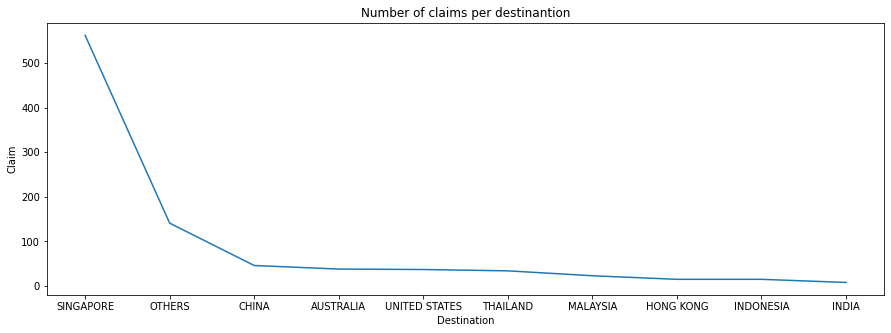

In [137]:
plt.figure(figsize=[15,5])
sns.lineplot(highest_Destination.index,highest_Destination['Claim'])
plt.title('Number of claims per destinantion')


Analysing which plan is purchased the most

In [81]:
most_pro = df.value_counts('Prod_Name').head(8)
most_pro

Prod_Name
Cancellation Plan                  18630
2 way Comprehensive Plan           13158
Rental Vehicle Excess Insurance     8580
Basic Plan                          5469
Bronze Plan                         4049
1 way Comprehensive Plan            3331
Value Plan                          2715
Silver Plan                         2249
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Maximum Plans Sold')

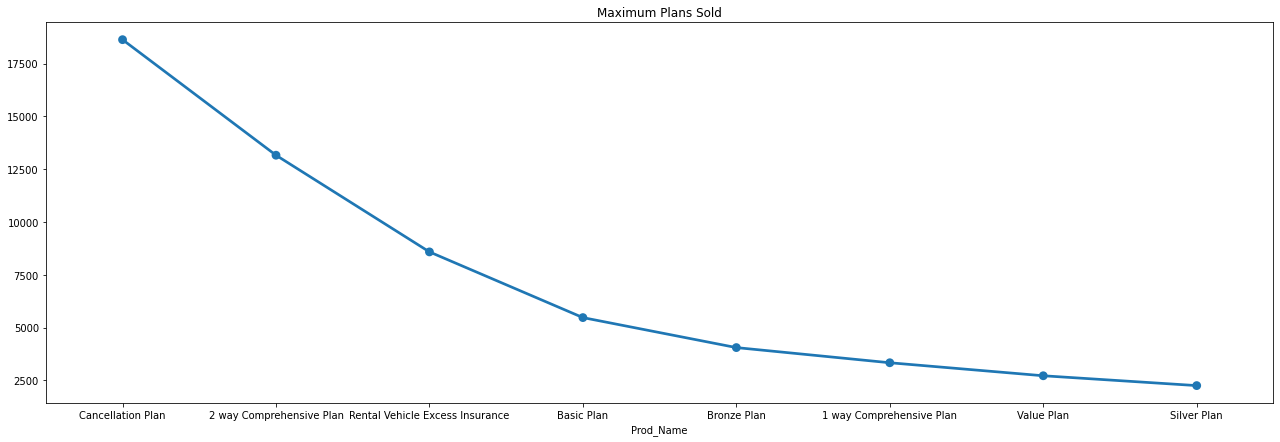

In [82]:
plt.figure(figsize=[22,7])
sns.pointplot(most_pro.index,most_pro)
plt.title('Maximum Plans Sold')

Effect of age on claims

In [83]:
age_claim = df.groupby('Age')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(20)
age_claim

,Claim
Age,
36,285
30,47
31,45
28,42
32,34
35,31
26,30
29,29
27,28


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age affecting claims')

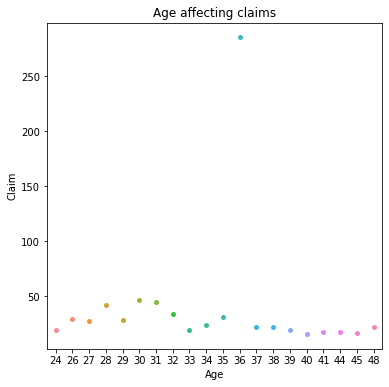

In [129]:
plt.figure(figsize=[6,6])
sns.swarmplot(age_claim.index,age_claim['Claim'])
plt.title('Age affecting claims')

Relation between Net_sales and insurance claims

In [111]:
Net_Sales_claim = df.groupby('Net_Sales')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(20)
Net_Sales_claim

,Claim
Net_Sales,
27.0,299
20.0,31
33.5,19
16.0,17
39.0,16
21.0,15
72.0,14
29.0,14
39.6,14


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation between Net_sales and claims')

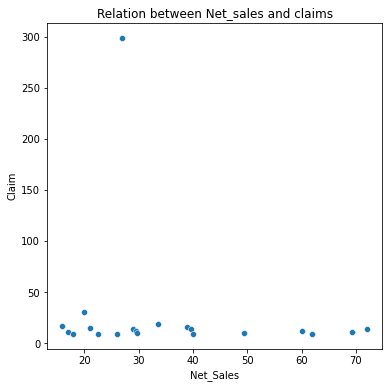

In [130]:
plt.figure(figsize=[6,6])
sns.scatterplot(Net_Sales_claim.index,Net_Sales_claim['Claim'])
plt.title('Relation between Net_sales and claims')

Relation between commission and claim

In [116]:
Commission_claim = df.groupby('Commission')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(20)
Commission_claim

,Claim
Commission,
0.00,199
63.21,56
54.00,48
8.38,19
6.75,19
46.96,16
4.00,15
23.76,14
18.00,14


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation between Commission and claims')

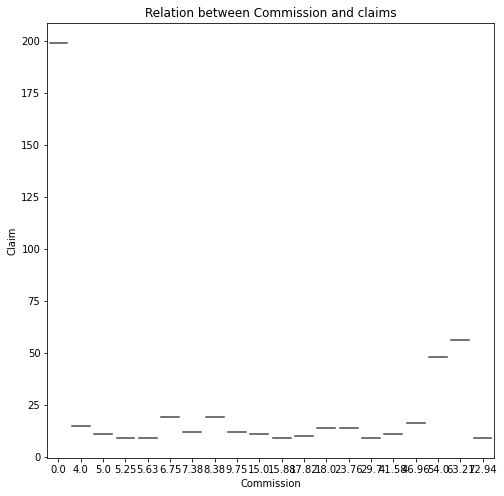

In [141]:
plt.figure(figsize=[8,8])
sns.violinplot(Commission_claim.index,Commission_claim['Claim'])
plt.title('Relation between Commission and claims')

Plotting the relation between all the features

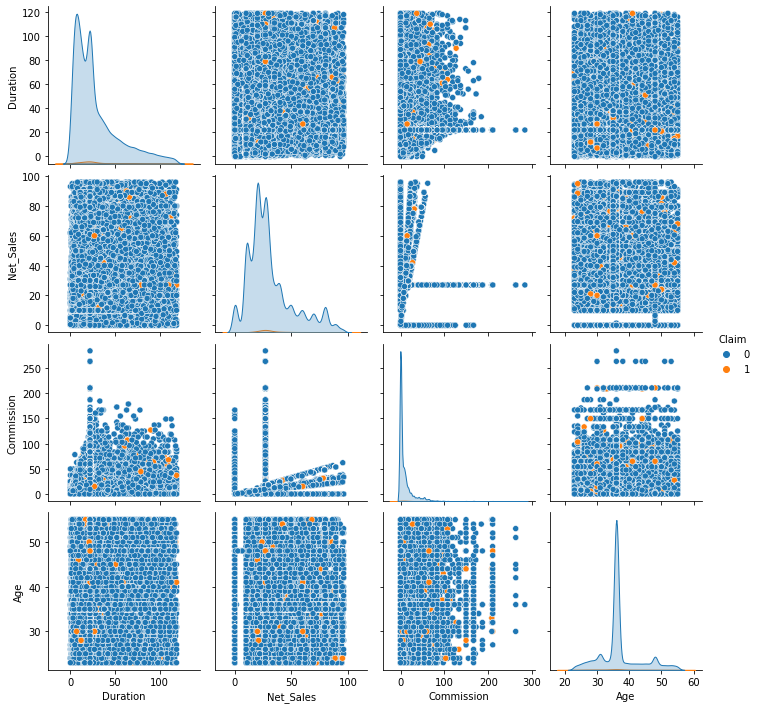

In [99]:
sns.pairplot(df, hue="Claim")

Corelation Map

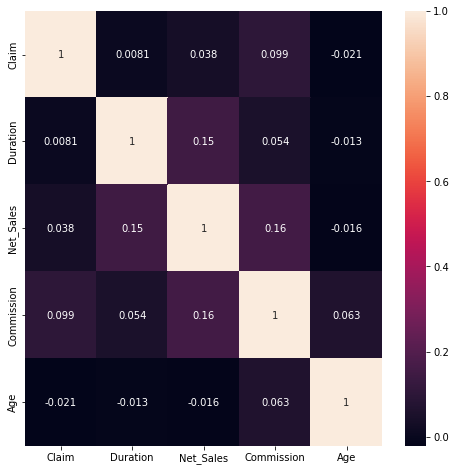

In [102]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, ax=ax)